λ = 0.7138 m
dcp = 0.1784 m
k = 8.8024 rad/m
θ1 min = 64.63°
Кути максимального випромінювання для FH (площина Н): [80.21409132]°
Кути максимального випромінювання для FE (площина Е): [74.48451337]°


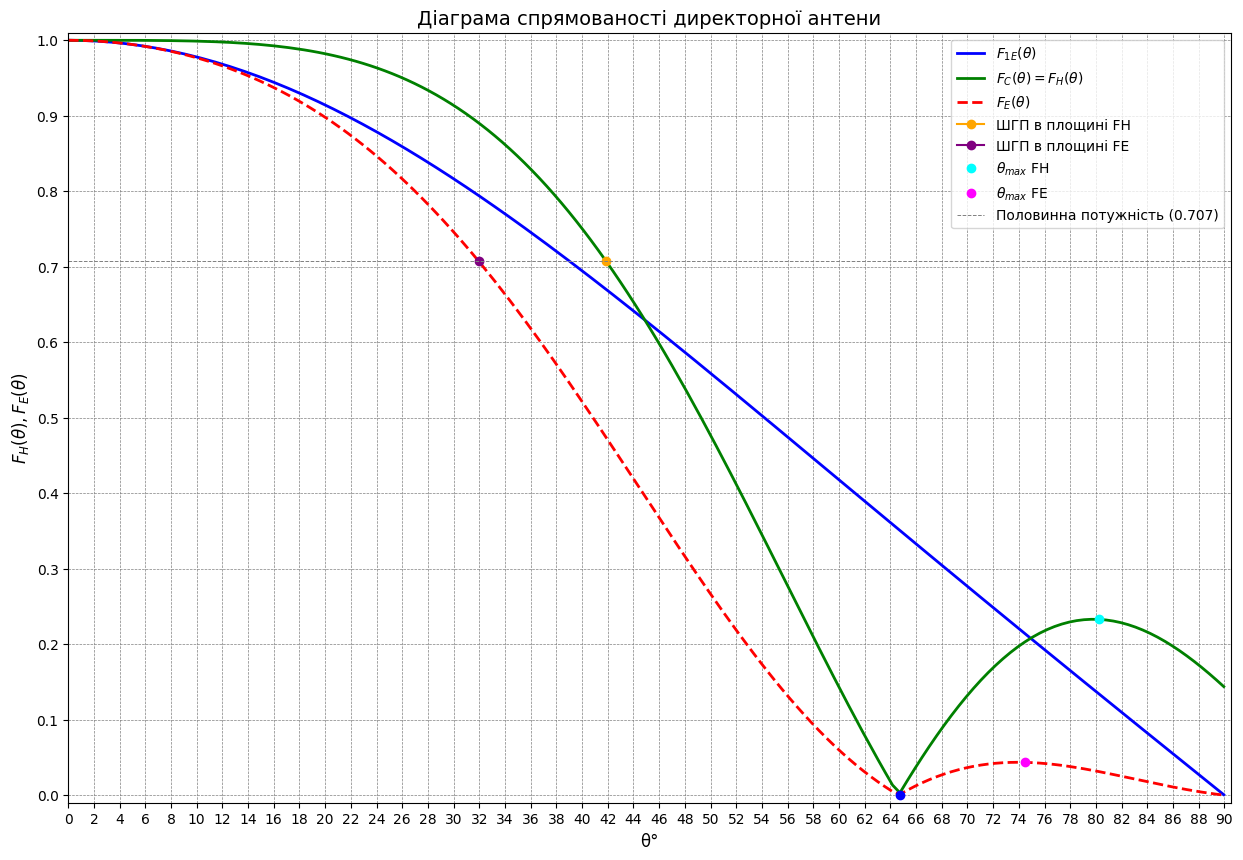

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

# Ініціалізуємо списки та змінні
FC = [1]  # "множник грат" : ДС антени в площині Н
FE = [1]  # ДС антени в площині Е
F1E = [1]  # ДС напівхвильового вібратора в площині Е

steps = [0]  # кути θ
SGP1 = 0  # Ширина головної пелюстки в площині FH
SGP2 = 0  # Ширина головної пелюстки в площині FE

Zeros = []  # нульові кути
N = 7  # Кількість елементів
F = 420e6  # Частота в Гц

wavelength = round(299792458 / F, 4)
dcp = round(0.25 * wavelength, 4) 
k = round((2 * np.pi) / wavelength, 4) 

print(f"λ = {wavelength} m")
print(f"dcp = {dcp} m")
print(f"k = {k} rad/m")

# Обчислюємо кути θ
m_values = np.arange(1, 11)
argument = np.clip(1 - (m_values * wavelength) / (N * dcp), -1, 1)
p_values = np.arccos(argument)
theta_min = np.round(np.degrees(p_values[p_values <= np.pi / 2]), 2)

# Виводимо мінімальні кути θ
for idx, theta in enumerate(theta_min):
    print(f"θ{idx + 1} min = {theta}\u00b0")

# Основний цикл для розрахунку ДС
theta = np.arange(0.01, np.pi / 2, 0.01)  # Створюємо масив тета
steps.extend(np.degrees(theta))  # Додаємо кут в градусах

# Розрахунки значень ДС
mn1 = np.abs(np.cos(np.pi / 2 * np.sin(theta)) / np.cos(theta))
mn2 = np.abs(np.sin((N * k * dcp * (1 - np.cos(theta)) / 2)) / 
                   (N * np.sin((k * dcp * (1 - np.cos(theta))) / 2)))
mn3 = mn1 * mn2

# Додаємо обчислені значення в списки
F1E.extend(mn1)
FC.extend(mn2)
FE.extend(mn3)

# Точний розрахунок ширини головної пелюстки
interp_mn2 = interp1d(mn2, theta, kind='linear', bounds_error=False, fill_value='extrapolate')
interp_mn3 = interp1d(mn3, theta, kind='linear', bounds_error=False, fill_value='extrapolate')

SGP1_exact = interp_mn2(0.707)
SGP2_exact = interp_mn3(0.707)

SGP1 = np.round(2 * np.degrees(SGP1_exact), 2)
SGP2 = np.round(2 * np.degrees(SGP2_exact), 2)

Zeros = np.round(np.degrees(theta[mn2 < 0.01]), 2)

# Визначення напрямків максимальних випромінювань
peaks_fc, _ = find_peaks(FC)  
theta_max_fc = np.degrees(theta[peaks_fc])  
FC_peaks = np.array(FC)[peaks_fc]  

peaks_fe, _ = find_peaks(FE)  
theta_max_fe = np.degrees(theta[peaks_fe])  
FE_peaks = np.array(FE)[peaks_fe]  

# Виведення кутів максимального випромінювання
print(f"Кути максимального випромінювання для FH (площина Н): {theta_max_fc}°")
print(f"Кути максимального випромінювання для FE (площина Е): {theta_max_fe}°")

# Розмір графіку
plt.figure(figsize=(15, 10))

# Побудова графіків ДС з новими кольорами
plt.plot(steps, F1E, label="$ F_{1E}(θ) $", linestyle="solid", color="blue", linewidth=2)
plt.plot(steps, FC, label="$ F_{C}(θ) = F_{H}(θ) $", linestyle="solid", color="green", linewidth=2)
plt.plot(steps, FE, label="$ F_{E}(θ) $", linestyle="dashed", color="red", linewidth=2)

# Позначаємо знайдені інтерпольовані точки
plt.plot(SGP1 / 2, 0.707, marker="o", color='orange', markersize=6, label="ШГП в площині FH")
plt.plot(SGP2 / 2, 0.707, marker="o", color='purple', markersize=6, label="ШГП в площині FE")

# Позначаємо нулі
plt.plot(Zeros, [0] * len(Zeros), 'bo')  

# Наносимо максимуми на графік
plt.plot(theta_max_fc, FC_peaks, "o", color="cyan", markersize=6, label="$ \\theta_{max} $ FH")
plt.plot(theta_max_fe, FE_peaks, "o", color="magenta", markersize=6, label="$ \\theta_{max} $ FE")

# Позначаємо рівень половинної потужності (0.707)
plt.axhline(y=0.707, color="gray", linestyle="dashed", label="Половинна потужність (0.707)", linewidth=0.7)

# Форматування графіку
plt.xlabel("θ" + '\u00b0', fontsize=12)
plt.ylabel("$ F_H(θ), F_E(θ) $", fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.grid(which='both', linestyle='--', linewidth=0.5, color='gray') 
plt.title("Діаграма спрямованості директорної антени", fontsize=14) 

# Задаємо розміри клітинок
plt.xticks(np.arange(0, 100, 2), fontsize=10)
plt.yticks(np.arange(0, 1.2, 0.1), fontsize=10)

# Задаємо ліміти відображення
plt.ylim(-0.01, 1.01) 
plt.xlim(0, 90.5) 

plt.show()